In [9]:
import numpy as np
from sklearn.cluster import SpectralClustering
import networkx as nx
import matplotlib.pyplot as plt


## Spectral Clustering vs K-means

c:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


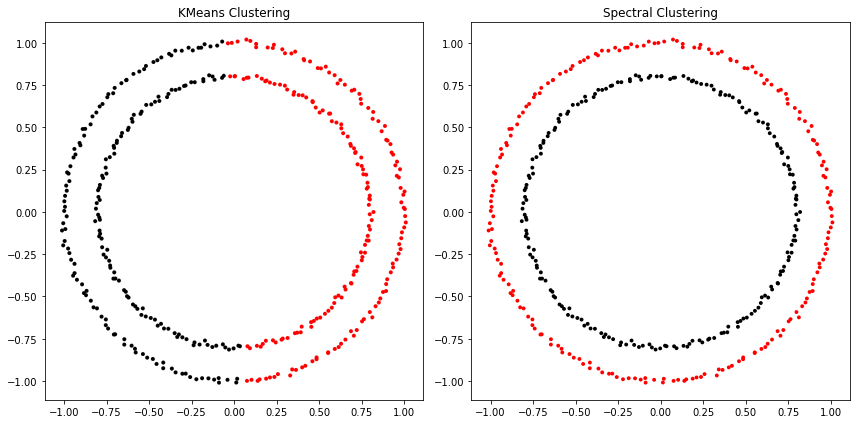

Davies-Bouldin Score for K means alg.: 1.1432775810235103
Davies-Bouldin Score for Spectral clustering: 2863.262350981662


In [34]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)



# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters, cmap='flag')
axes[0].set_title('KMeans Clustering')

axes[1].scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
axes[1].set_title('Spectral Clustering')

# Afficher la figure
plt.tight_layout()
plt.show()



print("Davies-Bouldin Score for K means alg.:", davies_bouldin_score(circles, clusters))
print("Davies-Bouldin Score for Spectral clustering:", davies_bouldin_score(circles, labels))



In [46]:
circles

array([[-5.35996999e-01, -8.40536408e-01],
       [-7.45641859e-01, -2.23615456e-01],
       [-2.32752335e-01, -7.71694766e-01],
       [ 9.87478742e-01, -1.20518419e-01],
       [ 8.48586167e-02,  7.94324381e-01],
       [-3.07451929e-01,  9.53378327e-01],
       [ 1.50461304e-01, -9.90067558e-01],
       [-2.85230945e-01,  7.47771416e-01],
       [-2.84419721e-01, -9.56133185e-01],
       [ 7.12299818e-01,  3.48435414e-01],
       [ 4.12092736e-01,  8.97054775e-01],
       [-4.77491087e-01, -8.69537600e-01],
       [-9.24128996e-01, -4.01120609e-01],
       [-5.15612214e-02, -8.01399292e-01],
       [ 9.26686356e-01,  3.51364515e-01],
       [-2.67467790e-01,  9.71089872e-01],
       [-7.88867052e-01,  1.59850350e-01],
       [-3.03806346e-01, -9.56814396e-01],
       [ 7.87249332e-01,  1.46711767e-01],
       [ 1.00642195e+00, -2.44632676e-02],
       [ 7.21712654e-01, -6.98380745e-01],
       [-4.44490820e-01,  6.81566134e-01],
       [-7.40857220e-01, -6.89615269e-01],
       [-1.

## Cora Dataset

In [39]:
# Load dataset
adj = np.load('../data/raw/cora/adj.npy')
feat = np.load('../data/raw/cora/feat.npy')
label = np.load('../data/raw/cora/label.npy')
adj.shape, feat.shape, label.shape

((2708, 2708), (2708, 1433), (2708,))

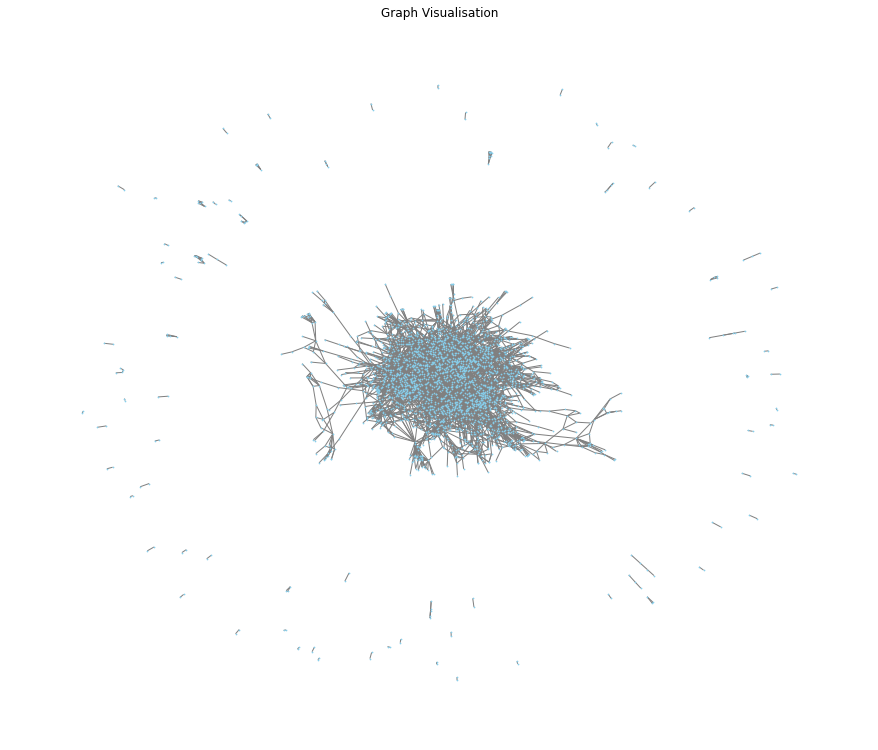

In [13]:
G = nx.from_numpy_array(adj)
# Visualiser le graphe
plt.figure(figsize=(12, 10))
nx.draw(G,  node_color='skyblue', node_size=0.5, edge_color='gray')
plt.title("Graph Visualisation")
plt.show()

In [54]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Charger la matrice d'adjacence à partir du fichier .npy
adj_matrix = adj

# Créer un objet Graph à partir de la matrice d'adjacence
G = nx.from_numpy_array(adj_matrix)

# Calculer la matrice Laplacienne normalisée du graphe
laplacian_matrix = nx.normalized_laplacian_matrix(G)

# Extraire les vecteurs propres de la matrice Laplacienne
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix.todense())

# Garder seulement les vecteurs propres correspondant aux k plus grandes valeurs propres
k = 7  # Nombre de clusters souhaités
idx = eigenvalues.argsort()[1:k+1]  # Exclure la première valeur propre (nulle)
k_eigenvectors = eigenvectors[:, idx]

# Effectuer le clustering spectral avec scikit-learn
spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', assign_labels='kmeans')
labels = spectral_clustering.fit_predict(nx.to_numpy_array(G))


c:\Users\joaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [45]:
from sklearn.metrics import accuracy_score



Kmean = skl_cluster.KMeans(n_clusters=7)
Kmean.fit(adj)
clusters = Kmean.predict(adj)

print("Accuracy for K means : ",accuracy_score(label,clusters))
print("Accuracy for Spectral clustering : ",accuracy_score(label,labels))


Davies-Bouldin Score for K means alg.: 2.0019779198541663
Davies-Bouldin Score for Spectral Clustering: 4.440977093852818


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(label,clusters))
print(accuracy_score(label,labels))